Dans ce projet , on va créer un classifieur des images à l'aide du modele d'apprentissage par profond (CNN) .

Importer les données et les bibliotheques necessaires 
===========================================

In [35]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import PIL 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

In [36]:

Folder = "/content/drive/MyDrive/Dataset/Alzheimer's Disease Classification/Axial/"

In [37]:
batch_size=32
img_height = 180 
img_width = 180

In [38]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    Folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 5164 files belonging to 3 classes.
Using 4132 files for training.


In [39]:
validation_dataset=tf.keras.utils.image_dataset_from_directory(
    Folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 5164 files belonging to 3 classes.
Using 1032 files for validation.


In [40]:
class_namess =train_dataset.class_names
class_namess

['AD', 'CI', 'CN']

Visulisation des donnees 
=========================

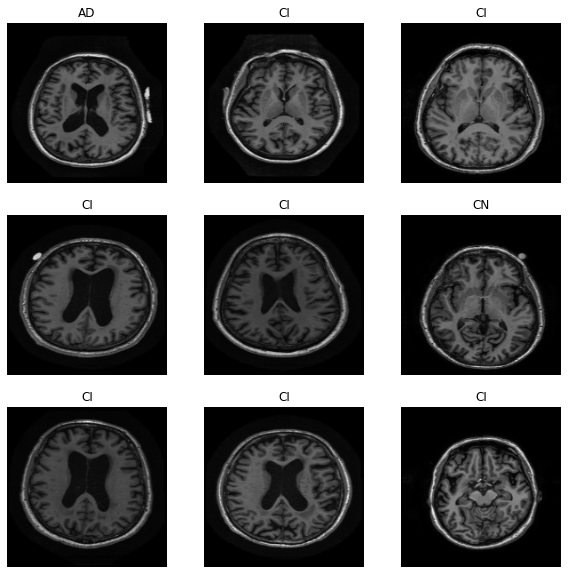

In [41]:
plt.figure(figsize=(10,10))
for images , labels in train_dataset.take(1):
  for i in range(9) :
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_namess[labels[i]])
    plt.axis("off")


In [42]:
for image_batch , labels_batch in train_dataset : 
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Standardisation des donneees : 
=====================================

In [43]:
normalisation_layer=layers.Rescaling(1./255)
normalized_ds=train_dataset.map(lambda x,y :(normalisation_layer(x),y))
image_batch,labels_batch = next(iter(normalized_ds))
first_imag=image_batch[0]

print(np.min(first_imag),np.max(first_imag))

0.0 0.82879174


la creation du modele :     
=========================

In [44]:
nombre_des_classes=len(class_namess)
model=Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(nombre_des_classes)]
)

l'optimisation du model
===========================

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Resumee du modele 
=======================

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

Formation du modele (training model)
======================= 

In [47]:
epochs=20
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/20
130/130 [==============================] - 657s 5s/step - loss: 0.7181 - accuracy: 0.6781 - val_loss: 0.3391 - val_accuracy: 0.8769
Epoch 2/20
130/130 [==============================] - 128s 983ms/step - loss: 0.1680 - accuracy: 0.9402 - val_loss: 0.1846 - val_accuracy: 0.9264
Epoch 3/20
130/130 [==============================] - 130s 997ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0373 - val_accuracy: 0.9855
Epoch 4/20
130/130 [==============================] - 128s 985ms/step - loss: 0.0271 - accuracy: 0.9891 - val_loss: 0.0179 - val_accuracy: 0.9961
Epoch 5/20
130/130 [==============================] - 128s 982ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9961
Epoch 6/20
130/130 [==============================] - 130s 994ms/step - loss: 2.1479e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9961
Epoch 7/20
130/130 [==============================] - 128s 979ms/step - loss: 1.1780e-04 - accuracy: 1.0000 - val_loss: 0.0

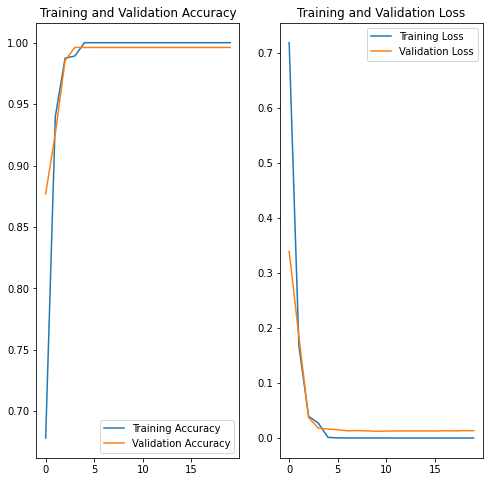

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()